# ME314 Homework 3 (Template)

*Please note that a **single** PDF file will be the only document that you turn in, which will include your answers to the problems with corresponding derivations and any code used to complete the problems. When including the code, please make sure you also include **code outputs**, and you don't need to include example code. Problems and deliverables that should be included with your submission are shown in **bold**.*

*This Juputer Notebook file serves as a template for you to start homework, since we recommend to finish the homework using Jupyter Notebook. You can start with this notebook file with your local Jupyter environment, or upload it to Google Colab. You can include all the code and other deliverables in this notebook Jupyter Notebook supports $\LaTeX$ for math equations, and you can export the whole notebook as a PDF file. But this is not the only option, if you are more comfortable with other ways, feel free to do so, as long as you can submit the homework in a single PDF file.*

***

In [74]:
#import necessary packages
import sympy as sym
import numpy as np
from sympy import sin, cos, tan, diff, simplify
import matplotlib.pyplot as plt



In [75]:
# --- PThis part is from google because I use jupyter notebook instead of collab ---

try:
    # Only works in Google Colab
    from google.colab.output._publish import javascript

    def custom_latex_printer(exp, **options):
        url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.1/latest.js?config=TeX-AMS_HTML"
        javascript(url=url)
        return sym.printing.latex(exp, **options)
    sym.init_printing(use_latex="mathjax", latex_printer=custom_latex_printer)

except ModuleNotFoundError:
    # Fallback for Jupyter or other environments
    sym.init_printing(use_latex="mathjax")

Below are the help functions in previous homeworks, which you may need for this homework.

In [76]:
def integrate(f, xt, dt):
    """
    This function takes in an initial condition x(t) and a timestep dt,
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x(t). It outputs a vector x(t+dt) at the future
    time step.

    Parameters
    ============
    dyn: Python function
        derivate of the system at a given step x(t),
        it can considered as \dot{x}(t) = func(x(t))
    xt: NumPy array
        current step x(t)
    dt:
        step size for integration

    Return
    ============
    new_xt:
        value of x(t+dt) integrated from x(t)
    """
    k1 = dt * f(xt)
    k2 = dt * f(xt+k1/2.)
    k3 = dt * f(xt+k2/2.)
    k4 = dt * f(xt+k3)
    new_xt = xt + (1/6.) * (k1+2.0*k2+2.0*k3+k4)
    return new_xt

def simulate(f, x0, tspan, dt, integrate):
    """
    This function takes in an initial condition x0, a timestep dt,
    a time span tspan consisting of a list [min_time, max_time],
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. It outputs a full trajectory simulated
    over the time span of dimensions (xvec_size, time_vec_size).

    Parameters
    ============
    f: Python function
        derivate of the system at a given step x(t),
        it can considered as \dot{x}(t) = func(x(t))
    x0: NumPy array
        initial conditions
    tspan: Python list
        tspan = [min_time, max_time], it defines the start and end
        time of simulation
    dt:
        time step for numerical integration
    integrate: Python function
        numerical integration method used in this simulation

    Return
    ============
    x_traj:
        simulated trajectory of x(t) from t=0 to tf
    """
    N = int((max(tspan)-min(tspan))/dt)
    x = np.copy(x0)
    tvec = np.linspace(min(tspan),max(tspan),N)
    xtraj = np.zeros((len(x0),N))
    for i in range(N):
        xtraj[:,i]=integrate(f,x,dt)
        x = np.copy(xtraj[:,i])
    return xtraj

def animate_double_pend(theta_array,L1=1,L2=1,T=10):
    """
    Function to generate web-based animation of double-pendulum system

    Parameters:
    ================================================
    theta_array:
        trajectory of theta1 and theta2, should be a NumPy array with
        shape of (2,N)
    L1:
        length of the first pendulum
    L2:
        length of the second pendulum
    T:
        length/seconds of animation duration

    Returns: None
    """

    ################################
    # Imports required for animation.
    from plotly.offline import init_notebook_mode, iplot
    from IPython.display import display, HTML
    import plotly.graph_objects as go

    #######################
    # Browser configuration.
    def configure_plotly_browser_state():
        import IPython
        display(IPython.core.display.HTML('''
            <script src="/static/components/requirejs/require.js"></script>
            <script>
              requirejs.config({
                paths: {
                  base: '/static/base',
                  plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
                },
              });
            </script>
            '''))
    configure_plotly_browser_state()
    init_notebook_mode(connected=False)

    ###############################################
    # Getting data from pendulum angle trajectories.
    xx1=L1*np.sin(theta_array[0])
    yy1=-L1*np.cos(theta_array[0])
    xx2=xx1+L2*np.sin(theta_array[0]+theta_array[1])
    yy2=yy1-L2*np.cos(theta_array[0]+theta_array[1])
    N = len(theta_array[0]) # Need this for specifying length of simulation

    ####################################
    # Using these to specify axis limits.
    xm=np.min(xx1)-0.5
    xM=np.max(xx1)+0.5
    ym=np.min(yy1)-2.5
    yM=np.max(yy1)+1.5

    ###########################
    # Defining data dictionary.
    # Trajectories are here.
    data=[dict(x=xx1, y=yy1,
               mode='lines', name='Arm',
               line=dict(width=2, color='blue')
              ),
          dict(x=xx1, y=yy1,
               mode='lines', name='Mass 1',
               line=dict(width=2, color='purple')
              ),
          dict(x=xx2, y=yy2,
               mode='lines', name='Mass 2',
               line=dict(width=2, color='green')
              ),
          dict(x=xx1, y=yy1,
               mode='markers', name='Pendulum 1 Traj',
               marker=dict(color="purple", size=2)
              ),
          dict(x=xx2, y=yy2,
               mode='markers', name='Pendulum 2 Traj',
               marker=dict(color="green", size=2)
              ),
        ]

    ################################
    # Preparing simulation layout.
    # Title and axis ranges are here.
    layout=dict(xaxis=dict(range=[xm, xM], autorange=False, zeroline=False,dtick=1),
                yaxis=dict(range=[ym, yM], autorange=False, zeroline=False,scaleanchor = "x",dtick=1),
                title='Double Pendulum Simulation',
                hovermode='closest',
                updatemenus= [{'type': 'buttons',
                               'buttons': [{'label': 'Play','method': 'animate',
                                            'args': [None, {'frame': {'duration': T, 'redraw': False}}]},
                                           {'args': [[None], {'frame': {'duration': T, 'redraw': False}, 'mode': 'immediate',
                                            'transition': {'duration': 0}}],'label': 'Pause','method': 'animate'}
                                          ]
                              }]
               )

    ########################################
    # Defining the frames of the simulation.
    # This is what draws the lines from
    # joint to joint of the pendulum.
    frames=[dict(data=[dict(x=[0,xx1[k],xx2[k]],
                            y=[0,yy1[k],yy2[k]],
                            mode='lines',
                            line=dict(color='red', width=3)
                            ),
                       go.Scatter(
                            x=[xx1[k]],
                            y=[yy1[k]],
                            mode="markers",
                            marker=dict(color="blue", size=12)),
                       go.Scatter(
                            x=[xx2[k]],
                            y=[yy2[k]],
                            mode="markers",
                            marker=dict(color="blue", size=12)),
                      ]) for k in range(N)]

    #######################################
    # Putting it all together and plotting.
    figure1=dict(data=data, layout=layout, frames=frames)
    iplot(figure1)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:31: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:31: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_70158/2972900301.py:2: SyntaxWarning: invalid escape sequence '\d'
  """
/tmp/ipykernel_70158/2972900301.py:31: SyntaxWarning: invalid escape sequence '\d'
  """


## Problem 1 (10pts)

Let $f:\mathbb{R}^2\to\mathbb{R}$ with $f(x,y)=-\cos(x+y)\cos(x-y)$.  Show that $(x,y)=(0,0)$ satisfies both the necessary and sufficient conditions to be a local minimizer of $f$.

*Hint 1: You will need to take the first- and second-order derivative of $f$ with respect to $[x,y]$.*

**Turn in: A scanned (or photograph from your phone or webcam) copy of your hand written solution. You can also use $\LaTeX$. If you use SymPy, then you just need to include a copy of code and the code outputs, with notes that explain why the code outputs indicate the necessary and sufficient conditions.**

## Insert handwork here


In [77]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/MuchenSun/ME314pngs/raw/master/twolinearmasses.png' width=500' height='350'></table>"))

## Problem 2 (20pts)

Compute the equations of motion for the two-mass-spring system (shown above) in $\theta=(\theta_1,\theta_2)$ coordinates. The first mass with mass $m_1$ is the one close to the wall, and the second mass is with mass $m_2$. Assume that there is a spring of spring constant $k_1$ between the first mass and the wall and a spring of spring constant $k_2$ between the first mass and the second mass.

**Turn in: A copy of the code used to symbolically solve for the equations of motion, also include the outputs of the code, which should be the equations of motion.**

In [78]:


# Define parameters and generalized coordinates ---

t = sym.Symbol('t', real=True)
m1, m2, k1, k2, L = sym.symbols('m_1 m_2 k_1 k_2 L', positive=True)
T_sym, V_sym, L_sym = sym.symbols('T V L')


# Generalized coordinates
th1 = sym.Function('theta_1')(t)
th2 = sym.Function('theta_2')(t)
th1_dot = diff(th1, t)
th2_dot = diff(th2, t)

#Kinematics: positions and velocities

# Geometry: each mass slides horizontally, with wall at top-left corner
y1 = L * tan(th1)
y2 = L * tan(th1 + th2)

y1_dot = diff(y1, t)
y2_dot = diff(y2, t)


#Kinetic Energy

T1 = (1/2) * m1 * (y1_dot**2)
T2 = (1/2) * m2 * (y2_dot**2)
T = sym.simplify(T1 + T2)


#Potential Energy

# Spring 1: between wall and mass 1
# Spring 2: between mass 1 and mass 2
V1 = (1/2) * k1 * (y1)**2
V2 = (1/2) * k2 * (y2 - y1)**2
V = sym.simplify(V1 + V2)


#Lagrangian

Lagr = sym.simplify(T - V)

# Pretty symbolic identifiers for display
display(sym.Eq(T_sym, T))
display(sym.Eq(V_sym, V))
display(sym.Eq(L_sym, Lagr))


#Euler–Lagrange equations

dL_dth1    = diff(Lagr, th1)
dL_dth1dot = diff(Lagr, th1_dot)
dL_dth2    = diff(Lagr, th2)
dL_dth2dot = diff(Lagr, th2_dot)

EL1 = sym.simplify(diff(dL_dth1dot, t) - dL_dth1)
EL2 = sym.simplify(diff(dL_dth2dot, t) - dL_dth2)

display(sym.Eq(EL1, 0))
display(sym.Eq(EL2, 0))


#Solve for accelerations

th1_ddot = diff(th1, (t, 2))
th2_ddot = diff(th2, (t, 2))
th1ddot_sym, th2ddot_sym = sym.symbols('\\ddot{θ}_1 \\ddot{θ}_2')

sol = sym.solve([EL1, EL2], [th1_ddot, th2_ddot], dict=True)[0]
th1_dd_expr = sym.simplify(sol[th1_ddot])
th2_dd_expr = sym.simplify(sol[th2_ddot])

# Display results
display(sym.Eq(th1ddot_sym, th1_dd_expr))
display(sym.Eq(th2ddot_sym, th2_dd_expr))


           ⎛              2                                                    ↪
           ⎜   ⎛d        ⎞                                                     ↪
           ⎜m₁⋅⎜──(θ₁(t))⎟                                2                    ↪
         2 ⎜   ⎝dt       ⎠       ⎛   2                   ⎞  ⎛d           d     ↪
T = 0.5⋅L ⋅⎜─────────────── + m₂⋅⎝tan (θ₁(t) + θ₂(t)) + 1⎠ ⋅⎜──(θ₁(t)) + ──(θ₂ ↪
           ⎜     4                                          ⎝dt          dt    ↪
           ⎝  cos (θ₁(t))                                                      ↪

↪       ⎞
↪       ⎟
↪      2⎟
↪     ⎞ ⎟
↪ (t))⎟ ⎟
↪     ⎠ ⎟
↪       ⎠

         2 ⎛      2                                              2⎞
V = 0.5⋅L ⋅⎝k₁⋅tan (θ₁(t)) + k₂⋅(tan(θ₁(t) + θ₂(t)) - tan(θ₁(t))) ⎠

           ⎛              2                               2                    ↪
         2 ⎜   ⎛d        ⎞       ⎛   2                   ⎞  ⎛d           d     ↪
    0.5⋅L ⋅⎜m₁⋅⎜──(θ₁(t))⎟  + m₂⋅⎝tan (θ₁(t) + θ₂(t)) + 1⎠ ⋅⎜──(θ₁(t)) + ──(θ₂ ↪
           ⎝   ⎝dt       ⎠                                  ⎝dt          dt    ↪
L = ────────────────────────────────────────────────────────────────────────── ↪
                                                                               ↪
                                                                               ↪

↪      2                                                                       ↪
↪     ⎞     4          ⎛      2                                              2 ↪
↪ (t))⎟ ⋅cos (θ₁(t)) - ⎝k₁⋅tan (θ₁(t)) + k₂⋅(tan(θ₁(t) + θ₂(t)) - tan(θ₁(t)))  ↪
↪     ⎠                                                                        ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪      4                   

                                                                               ↪
                                                                               ↪
                                                                               ↪
     2                                                                         ↪
1.0⋅L ⋅k₁⋅tan(θ₁(t))        2       3                       2       2          ↪
──────────────────── + 1.0⋅L ⋅k₂⋅tan (θ₁(t) + θ₂(t)) - 1.0⋅L ⋅k₂⋅tan (θ₁(t) +  ↪
       2                                                                       ↪
    cos (θ₁(t))                                                                ↪

↪                                                                              ↪
↪                                                                              ↪
↪                                                                              ↪
↪                                                                              ↪
↪                          

                             ⎛                                                 ↪
 2 ⎛   2                   ⎞ ⎜                                                 ↪
L ⋅⎝tan (θ₁(t) + θ₂(t)) + 1⎠⋅⎜1.0⋅k₂⋅(tan(θ₁(t) + θ₂(t)) - tan(θ₁(t))) - 2.0⋅m ↪
                             ⎜                                                 ↪
                             ⎝                                                 ↪

↪                                                    2                         ↪
↪   ⎛   2                   ⎞ ⎛d           d        ⎞                          ↪
↪ ₂⋅⎝tan (θ₁(t) + θ₂(t)) + 1⎠⋅⎜──(θ₁(t)) + ──(θ₂(t))⎟ ⋅tan(θ₁(t) + θ₂(t)) + m₂ ↪
↪                             ⎝dt          dt       ⎠                          ↪
↪                                                                              ↪

↪                            ⎛                           2                     ↪
↪  ⎛   2                   ⎞ ⎜    ⎛d           d        ⎞                      ↪
↪ ⋅⎝tan (θ₁(t) + θ₂(t)) + 

                                           2   ⎛        2                      ↪
                                ⎛d        ⎞    ⎝- k₁⋅sin (θ₁(t))⋅tan(θ₂(t)) +  ↪
            - 2.0⋅m₁⋅sin(θ₁(t))⋅⎜──(θ₁(t))⎟  + ─────────────────────────────── ↪
                                ⎝dt       ⎠                                 ta ↪
\ddot{θ}₁ = ────────────────────────────────────────────────────────────────── ↪
                                                                m₁⋅cos(θ₁(t))  ↪

↪                                         ⎞           
↪ k₁⋅sin(θ₁(t))⋅cos(θ₁(t)) - k₂⋅tan(θ₂(t))⎠⋅cos(θ₁(t))
↪ ────────────────────────────────────────────────────
↪ n(θ₁(t))⋅tan(θ₂(t)) - 1                             
↪ ────────────────────────────────────────────────────
↪                                                     

                                                                               ↪
                     3           2                                      3      ↪
            k₁⋅m₂⋅cos (θ₁(t))⋅tan (θ₁(t) + θ₂(t))⋅tan(θ₁(t)) + k₁⋅m₂⋅cos (θ₁(t ↪
                                                                               ↪
\ddot{θ}₂ = ────────────────────────────────────────────────────────────────── ↪
                                                                               ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪ ))⋅tan(θ₁(t)) + k₂⋅m₁⋅sin(θ₁(t)) - k₂⋅m₁⋅cos(θ₁(t))⋅tan(θ₁(t) + θ₂(t)) - k₂⋅ ↪
↪                                                                              ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪                          

## Problem 3 (10pts)

For the same two-spring-mass system in Problem 2, show by example that Newton's equations do not hold in an arbitrary choice of coordinates (but they do, of course, hold in Cartesian coordinates). Your example should be implemented using Python's SymPy package.

*Hint 1: In other words, you need to find a set of coordinates $q=[q_1,q_2]$, and compute the equations of motion ($F=ma=m\ddot{q}$), showing that these equations of motion do not make the same prediction as Newton's laws in the Cartesian inertially fixed frame (where they are correct).*

*Hint 2: Newton's equations don't hold in non-inertia coordinates. For the $x_1,x_2$ and $y_1,y_2$ coordinates shown in the image, one of them is non-inertia coordinate.*

**Turn in: A copy of code you used to symbolically compute the equations of motion to show that Newton's equations don't hold. Also, include the output of the code, which should be the equations of motion under the chosen set of coordinates (indicate what coordinate you choose in the comments).**

In [79]:
#Compare to "naive" Newton’s Law in y-coordinates

# Define symbolic stand-ins for y1 and y2
y1_sym, y2_sym = sym.symbols('y_1 y_2')

# Re-express potential energy V in terms of y1_sym, y2_sym
V_y = V.subs({y1: y1_sym, y2: y2_sym})

# Forces from potential: F = -∂V/∂y
F1_y = -sym.diff(V_y, y1_sym)
F2_y = -sym.diff(V_y, y2_sym)

# Substitute back real y1, y2 expressions
F1_y = F1_y.subs({y1_sym: y1, y2_sym: y2})
F2_y = F2_y.subs({y1_sym: y1, y2_sym: y2})

# Newton’s equations in y-space (naively applied)
y1_ddot = sym.diff(y1, (t, 2))
y2_ddot = sym.diff(y2, (t, 2))
N1 = sym.simplify(m1 * y1_ddot - F1_y)
N2 = sym.simplify(m2 * y2_ddot - F2_y)

display(sym.Eq(N1, 0))
display(sym.Eq(N2, 0))

# Compare Newton’s vs. Lagrange predictions

# Replace y(t) expressions back into EL equations
# These differ, proving Newton’s equations fail in these coordinates
diff_eq1 = sym.simplify(EL1 - N1)
diff_eq2 = sym.simplify(EL2 - N2)

print("\nDifference between true (Lagrange) EOM and naive Newton’s Law:")
display(diff_eq1)
display(diff_eq2)


     ⎛                        2    2        ⎞    
     ⎜             ⎛d        ⎞    d         ⎟    
L⋅m₁⋅⎜2⋅tan(θ₁(t))⋅⎜──(θ₁(t))⎟  + ───(θ₁(t))⎟    
     ⎜             ⎝dt       ⎠      2       ⎟    
     ⎝                            dt        ⎠    
───────────────────────────────────────────── = 0
                    2                            
                 cos (θ₁(t))                     

                               ⎛                         2                     ↪
     ⎛   2                   ⎞ ⎜  ⎛d           d        ⎞                      ↪
L⋅m₂⋅⎝tan (θ₁(t) + θ₂(t)) + 1⎠⋅⎜2⋅⎜──(θ₁(t)) + ──(θ₂(t))⎟ ⋅tan(θ₁(t) + θ₂(t))  ↪
                               ⎜  ⎝dt          dt       ⎠                      ↪
                               ⎝                                               ↪

↪    2            2        ⎞    
↪   d            d         ⎟    
↪ + ───(θ₁(t)) + ───(θ₂(t))⎟ = 0
↪     2            2       ⎟    
↪   dt           dt        ⎠    


Difference between true (Lagrange) EOM and naive Newton’s Law:


  ⎛                               2                        2             ⎛     ↪
  ⎜                    ⎛d        ⎞                        d              ⎜     ↪
L⋅⎜2.0⋅L⋅m₁⋅sin(θ₁(t))⋅⎜──(θ₁(t))⎟  + 1.0⋅L⋅m₁⋅cos(θ₁(t))⋅───(θ₁(t)) + L⋅⎜1.0⋅ ↪
  ⎜                    ⎝dt       ⎠                          2            ⎜     ↪
  ⎝                                                       dt             ⎝     ↪
────────────────────────────────────────────────────────────────────────────── ↪
                                                                               ↪
                                                                               ↪

↪                                                                              ↪
↪       3                            2                                         ↪
↪ k₂⋅tan (θ₁(t) + θ₂(t)) - 1.0⋅k₂⋅tan (θ₁(t) + θ₂(t))⋅tan(θ₁(t)) - 1.0⋅k₂⋅tan( ↪
↪                                                                              ↪
↪                          

  ⎛  ⎛                                                                         ↪
  ⎜  ⎜                                                  ⎛   2                  ↪
L⋅⎜L⋅⎜1.0⋅k₂⋅(tan(θ₁(t) + θ₂(t)) - tan(θ₁(t))) - 2.0⋅m₂⋅⎝tan (θ₁(t) + θ₂(t)) + ↪
  ⎜  ⎜                                                                         ↪
  ⎝  ⎝                                                                         ↪

↪                            2                                                 ↪
↪   ⎞ ⎛d           d        ⎞                          ⎛   2                   ↪
↪  1⎠⋅⎜──(θ₁(t)) + ──(θ₂(t))⎟ ⋅tan(θ₁(t) + θ₂(t)) + m₂⋅⎝tan (θ₁(t) + θ₂(t)) +  ↪
↪     ⎝dt          dt       ⎠                                                  ↪
↪                                                                              ↪

↪    ⎛                           2                           2                 ↪
↪  ⎞ ⎜    ⎛d           d        ⎞                           d                d ↪
↪ 1⎠⋅⎜4.0⋅⎜──(θ₁(t)) + ──(

## Problem 4 (10pts)

For the same double-pendulum system hanging in gravity in Homework 2, take $q=[\theta_1, \theta_2]$ as the system configuration variables, with $R_1=R_2=1, m_1=m_2=1$. Symbolically compute the Hamiltonian of this system using Python's SymPy package.

**Turn in: A copy of the code used to symbolically compute the Hamiltonian of the system, also include the output of the code, which should the Hamiltonian of the system.**

In [80]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/MuchenSun/ME314pngs/raw/master/dyndoublepend.png' width=500' height='350'></table>"))

In [81]:
#Symbols and generalized coordinates
t, g = sym.symbols('t g', positive=True)
m1, m2, R1, R2 = sym.symbols('m_1 m_2 R_1 R_2', positive=True)

th1 = sym.Function('theta_1')(t)
th2 = sym.Function('theta_2')(t)

th1_dot = sym.diff(th1, t)
th2_dot = sym.diff(th2, t)

#Position of each mass
x1 = R1 * sym.sin(th1)
y1 = -R1 * sym.cos(th1)

x2 = x1 + R2 * sym.sin(th1 + th2)
y2 = y1 - R2 * sym.cos(th1 + th2)

#Velocities
x1_dot = sym.diff(x1, t)
y1_dot = sym.diff(y1, t)
x2_dot = sym.diff(x2, t)
y2_dot = sym.diff(y2, t)

#Kinetic and potential energy
T1 = (1/2) * m1 * (x1_dot**2 + y1_dot**2)
T2 = (1/2) * m2 * (x2_dot**2 + y2_dot**2)
T = sym.simplify(T1 + T2)

V1 = m1 * g * y1
V2 = m2 * g * y2
V = sym.simplify(V1 + V2)

#Lagrangian
L = sym.simplify(T - V)

#Generalized momenta p = ∂L/∂θ̇
p1 = sym.diff(L, th1_dot)
p2 = sym.diff(L, th2_dot)

#Hamiltonian H = Σ p_i θ̇_i - L
H = sym.simplify(p1*th1_dot + p2*th2_dot - L)

#Substitute constants R1=R2=1, m1=m2=1
params = {R1:1, R2:1, m1:1, m2:1}

H_sub = H.subs(params)

#Display results
sym.init_printing(use_latex=True)
display(sym.Eq(sym.Symbol('T'), sym.simplify(T.subs(params))))
display(sym.Eq(sym.Symbol('V'), sym.simplify(V.subs(params))))
display(sym.Eq(sym.Symbol('L'), sym.simplify(L.subs(params))))
display(sym.Eq(sym.Symbol('p_1'), sym.simplify(p1.subs(params))))
display(sym.Eq(sym.Symbol('p_2'), sym.simplify(p2.subs(params))))
display(sym.Eq(sym.Symbol('H'), sym.simplify(H_sub)))


## Problem 5 (10pts)

Simulate the double-pendulum system in Problem 4 with initial condition $\theta_1=\theta_2=-\frac{\pi}{2}, \dot{\theta}_1=\dot{\theta}_2=0$ for $t\in[0,10]$ and $dt=0.01$. Numerically evaluate the Hamiltonian of this system from the simulated trajectory, and plot it.

*Hint 1: The Hamiltonian can be numerically evaluated as a function of $\theta_1, \theta_2, \dot{\theta}_1, \dot{\theta}_2$, which means for each time step in the simulated trajectory, you can compute the Hamiltonian for this time step, and store it in a list or array for plotting later. This doesn't need to be done during the numerical simulation, after you have the simulated the trajectory you can access each time step within another loop.*

**Turn in: A copy of the code used to numerically evaluate and plot the Hamiltonian, also include the output of the code, which should be the plot of Hamiltonian.**

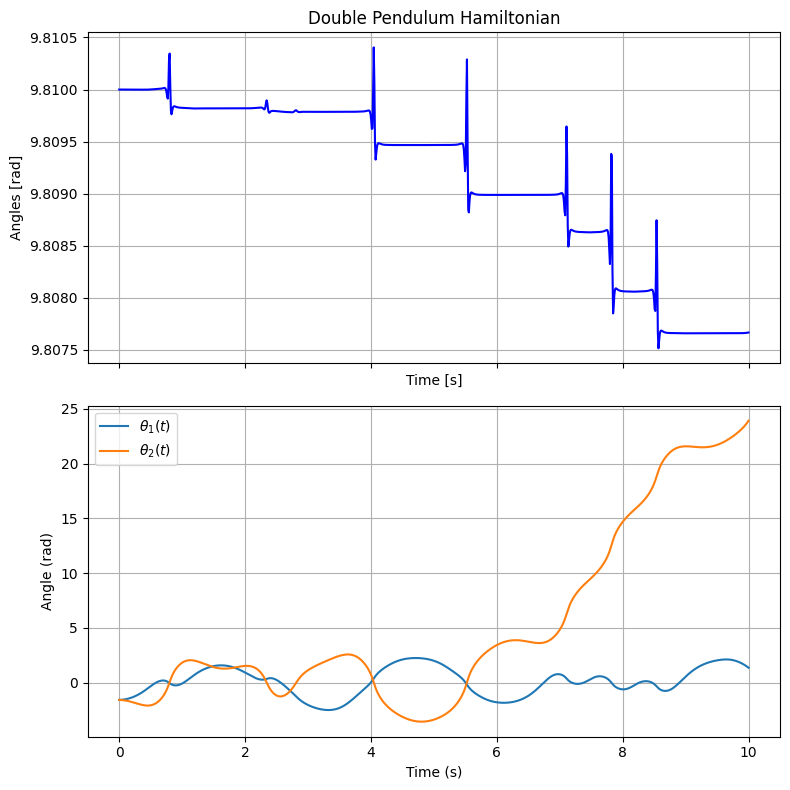

In [82]:
#Euler–Lagrange equations
dL_dth1 = sym.diff(L, th1)
dL_dth1dot = sym.diff(L, th1_dot)
dL_dth2 = sym.diff(L, th2)
dL_dth2dot = sym.diff(L, th2_dot)

EL1 = sym.simplify(sym.diff(dL_dth1dot, t) - dL_dth1)
EL2 = sym.simplify(sym.diff(dL_dth2dot, t) - dL_dth2)

th1_ddot = sym.diff(th1, (t, 2))
th2_ddot = sym.diff(th2, (t, 2))

#Solve for accelerations θ̈₁, θ̈₂
sol = sym.solve([EL1, EL2], [th1_ddot, th2_ddot], dict=True)[0]
th1_dd_expr = sym.simplify(sol[th1_ddot])
th2_dd_expr = sym.simplify(sol[th2_ddot])

#Substitute constants R1=R2=1, m1=m2=1
params = {R1:1, R2:1, m1:1, m2:1, g:9.81}
th1_dd_expr = th1_dd_expr.subs(params)
th2_dd_expr = th2_dd_expr.subs(params)

# Lambdify accelerations
f_th1dd = sym.lambdify([th1, th2, th1_dot, th2_dot], th1_dd_expr, 'numpy')
f_th2dd = sym.lambdify([th1, th2, th1_dot, th2_dot], th2_dd_expr, 'numpy')

#Define dynamics function for simulate()
def dyn(s):
    th1, th1dot, th2, th2dot = s
    return np.array([
        th1dot,
        f_th1dd(th1, th2, th1dot, th2dot),
        th2dot,
        f_th2dd(th1, th2, th1dot, th2dot)
    ])

#Use provided integrate() and simulate() functions
def integrate(f, xt, dt):
    k1 = dt * f(xt)
    k2 = dt * f(xt + k1/2.)
    k3 = dt * f(xt + k2/2.)
    k4 = dt * f(xt + k3)
    return xt + (1/6.) * (k1 + 2*k2 + 2*k3 + k4)

def simulate(f, x0, tspan, dt, integrate):
    N = int((max(tspan) - min(tspan)) / dt)
    x = np.copy(x0)
    tvec = np.linspace(min(tspan), max(tspan), N)
    xtraj = np.zeros((len(x0), N))
    for i in range(N):
        xtraj[:, i] = integrate(f, x, dt)
        x = np.copy(xtraj[:, i])
    return xtraj, tvec

#Run simulation
dt = 0.01
s0 = np.array([-np.pi/2, 0.0, -np.pi/2, 0.0])
traj, tvec = simulate(dyn, s0, [0, 10], dt, integrate)

#Compute Hamiltonian
p1 = sym.diff(L, th1_dot).subs(params)
p2 = sym.diff(L, th2_dot).subs(params)
H = sym.simplify(p1*th1_dot + p2*th2_dot - L).subs(params)
f_H = sym.lambdify([th1, th2, th1_dot, th2_dot], H, 'numpy')

H_vals = f_H(traj[0,:], traj[2,:], traj[1,:], traj[3,:])

#Plot θ₁(t), θ₂(t), and Hamiltonian H(t)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# Hamiltonian plot
ax1.plot(tvec, H_vals, 'b')
ax1.set_ylabel('Hamiltonian H(t)')
ax1.set_title('Double Pendulum Hamiltonian')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Angles [rad]')
ax1.grid(True)


# Theta1 and Theta2 plot
ax2.plot(tvec, traj[0,:], label=r'$\theta_1(t)$')
ax2.plot(tvec, traj[2,:], label=r'$\theta_2(t)$')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Angle (rad)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# fig, ax1 = plt.subplots(figsize=(10,5))
#
# ax1.plot(tvec, traj[0,:], label=r'$\theta_1(t)$', color='tab:blue')
# ax1.plot(tvec, traj[2,:], label=r'$\theta_2(t)$', color='tab:orange')
# ax1.set_xlabel('Time [s]')
# ax1.set_ylabel('Angles [rad]')
# ax1.legend(loc='upper left')
# ax1.grid(True)
#
# # Secondary y-axis for Hamiltonian
# ax2 = ax1.twinx()
# ax2.plot(tvec, H_vals, label='Hamiltonian H(t)', color='tab:red', alpha=0.7)
# ax2.set_ylabel('Energy [Joules]', color='tab:red')
# ax2.tick_params(axis='y', labelcolor='tab:red')
#
# fig.suptitle('Double Pendulum Simulation: θ₁(t), θ₂(t), and Hamiltonian H(t)')
# fig.tight_layout()
# plt.show()


## Problem 6 (15pts)

In the previously provided code for simulation, the numerical integration is a forth-order Runge–Kutta integration. Now, write down your own numerical integration function using Euler's method, and use your numerical integration function to simulate the same double-pendulum system with same parameters and initial condition in Problem 4. Compute and plot the Hamiltonian from the simulated trajectory, what's the difference between two plots?

*Hint 1: You will need to implement a new {\tt integrate()} function. This function takes in three inputs: a function $f(x)$ representing the dynamics of the system state $x$ (you can consider it as $\dot{x}=f(x)$), current state $x$ (for example $x(t)$ if $t$ is the current time step), and integration step length $dt$. This function should output $x(t+dt)$, for which the analytical solution is $x(t+dt) = x(t) + \int_t^{t+dt} f(x(\tau)) d\tau$. Thus, you need to think about how to numerically evaluate this integration using Euler's method.*

*Hint 2: The implemented function should have the same input-output structure as the previous one.*

*Hint 3: After you implement the new integration function, you can use the same helper function ${\tt simulate()}$ for simulation. You just need to input replace the integration function name as the new one (for example, your new function can be named as ${\tt euler\_integrate()}$). Please carefully read the comments in the ${\tt simulate()}$ function. Below is the template/example of how to implement the new integration function and use it for simulation.*

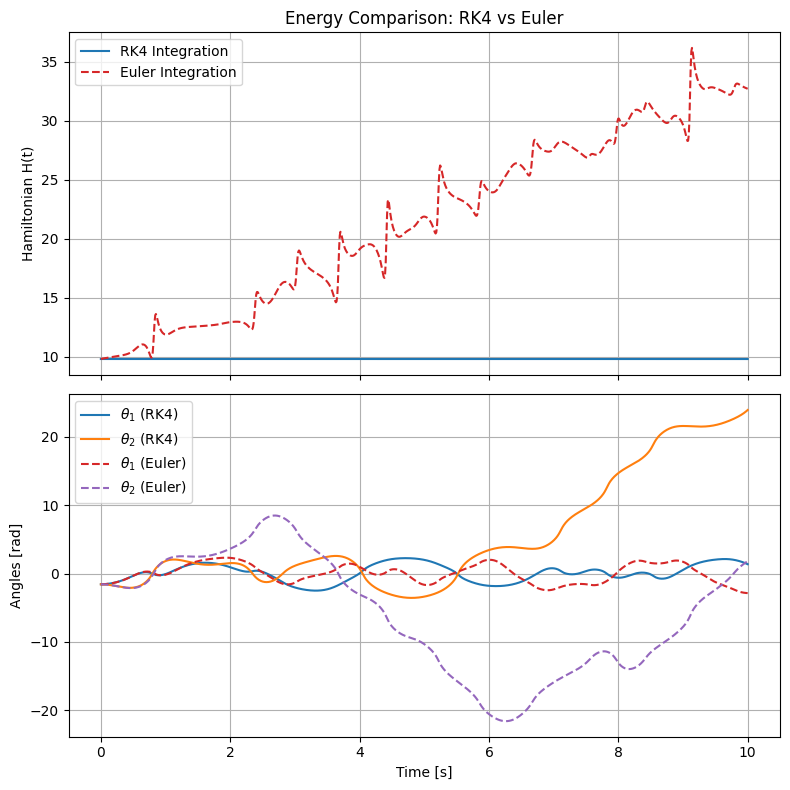

In [83]:
#Euler integration function (new)
def euler_integrate(f, xt, dt):
    """
    Euler's Method Integration
    x(t+dt) = x(t) + dt * f(x(t))
    """
    return xt + dt * f(xt)


#Run simulation with Euler method
dt = 0.01
s0 = np.array([-np.pi/2, 0.0, -np.pi/2, 0.0])
traj_euler, tvec = simulate(dyn, s0, [0, 10], dt, euler_integrate)
H_euler = f_H(traj_euler[0,:], traj_euler[2,:], traj_euler[1,:], traj_euler[3,:])

#Compare to RK4 results (reuse previous integrate)
def rk4_integrate(f, xt, dt):
    k1 = dt * f(xt)
    k2 = dt * f(xt + k1/2.)
    k3 = dt * f(xt + k2/2.)
    k4 = dt * f(xt + k3)
    return xt + (1/6.) * (k1 + 2*k2 + 2*k3 + k4)

traj_rk4, _ = simulate(dyn, s0, [0, 10], dt, rk4_integrate)
H_rk4 = f_H(traj_rk4[0,:], traj_rk4[2,:], traj_rk4[1,:], traj_rk4[3,:])

#Plot comparison
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# Hamiltonian Comparison
ax1.plot(tvec, H_rk4, label='RK4 Integration', color='tab:blue')
ax1.plot(tvec, H_euler, '--', label='Euler Integration', color='tab:red')
ax1.set_ylabel('Hamiltonian H(t)')
ax1.set_title('Energy Comparison: RK4 vs Euler')
ax1.legend()
ax1.grid(True)

# Angle trajectories
ax2.plot(tvec, traj_rk4[0,:], label=r'$\theta_1$ (RK4)', color='tab:blue')
ax2.plot(tvec, traj_rk4[2,:], label=r'$\theta_2$ (RK4)', color='tab:orange')
ax2.plot(tvec, traj_euler[0,:], '--', label=r'$\theta_1$ (Euler)', color='tab:red')
ax2.plot(tvec, traj_euler[2,:], '--', label=r'$\theta_2$ (Euler)', color='tab:purple')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Angles [rad]')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


## Problem 7 (20pts)

For the same double-pendulum you simulated in Problem 4 with same parameters and initial condition, now add a constraint to the system such that the distance between the second pendulum and the origin is fixed at $\sqrt{2}$. Simulate the system with same parameters and initial condition, and animate the system with the same animate function provided in homework 2.

*Hint 1: What do you think the equations of motion should look like? Think about how the system will behave after adding the constraint. With no double, you can solve this problem using $\phi$ and all the following results for constrained Euler-Lagrange equations, however, if you really understand this constrained system, things might be much easier, and you can actually treat it as an unconstrained system.*

**Turn in: A copy of code used to numerically evaluate, simulate and animate the system. Also, upload the video of animation separately through Canvas, the video should be in ".mp4" format, and you can use screen capture or record the screen directly with your phone.**

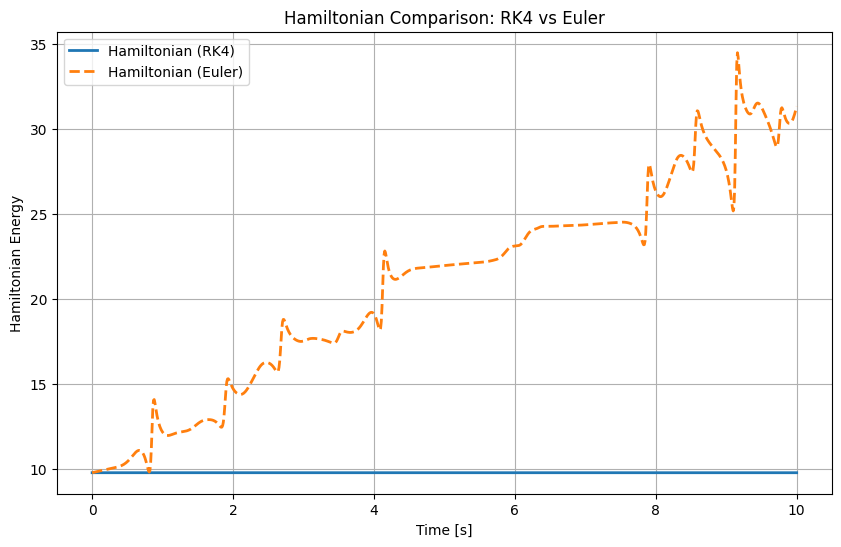

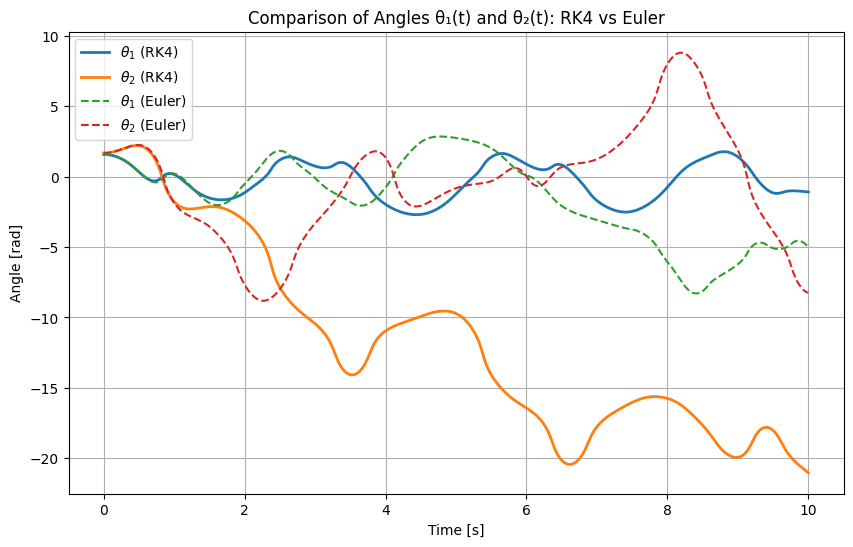

In [84]:
# System Parameters
m1 = m2 = 1.0
L1 = L2 = 1.0
g = 9.81

# Double Pendulum Dynamics
def double_pendulum_dynamics(state):
    θ1, θ2, ω1, ω2 = state
    θ1_dd = f_th1dd(θ1, θ2, ω1, ω2)
    θ2_dd = f_th2dd(θ1, θ2, ω1, ω2)
    return np.array([ω1, ω2, θ1_dd, θ2_dd])

# Integration Methods
def rk4_integrate(f, xt, dt):
    k1 = dt * f(xt)
    k2 = dt * f(xt + k1 / 2.)
    k3 = dt * f(xt + k2 / 2.)
    k4 = dt * f(xt + k3)
    return xt + (1 / 6.) * (k1 + 2 * k2 + 2 * k3 + k4)

def euler_integrate(f, xt, dt):
    """Simple Euler method"""
    return xt + dt * f(xt)


# Simulation Function
def simulate(f, x0, tspan, dt, integrate):
    N = int((tspan[1] - tspan[0]) / dt)
    tvec = np.linspace(tspan[0], tspan[1], N)
    xtraj = np.zeros((len(x0), N))
    x = np.copy(x0)
    for i in range(N):
        xtraj[:, i] = x
        x = integrate(f, x, dt)
    return tvec, xtraj

# Hamiltonian Computation
def hamiltonian(traj):
    θ1, θ2, ω1, ω2 = traj
    return f_H(θ1, θ2, ω1, ω2)


# Run Simulations
x0 = np.array([np.pi/2, np.pi/2 + 0.1, 0, 0])  # initial conditions
tspan = [0, 10]
dt = 0.01

t_rk4, traj_rk4 = simulate(double_pendulum_dynamics, x0, tspan, dt, rk4_integrate)
t_euler, traj_euler = simulate(double_pendulum_dynamics, x0, tspan, dt, euler_integrate)


# Compute Hamiltonians
H_rk4 = hamiltonian(traj_rk4)
H_euler = hamiltonian(traj_euler)


# Plot Results
plt.figure(figsize=(10,6))
plt.plot(t_rk4, H_rk4, label="Hamiltonian (RK4)", lw=2)
plt.plot(t_euler, H_euler, label="Hamiltonian (Euler)", lw=2, ls='--')
plt.title("Hamiltonian Comparison: RK4 vs Euler")
plt.xlabel("Time [s]")
plt.ylabel("Hamiltonian Energy")
plt.legend()
plt.grid()
plt.show()


# Plot 2: Angles comparison
plt.figure(figsize=(10,6))
plt.plot(t_rk4, traj_rk4[0], label=r"$\theta_1$ (RK4)", lw=2)
plt.plot(t_rk4, traj_rk4[1], label=r"$\theta_2$ (RK4)", lw=2)
plt.plot(t_euler, traj_euler[0], '--', label=r"$\theta_1$ (Euler)", lw=1.5)
plt.plot(t_euler, traj_euler[1], '--', label=r"$\theta_2$ (Euler)", lw=1.5)
plt.title("Comparison of Angles θ₁(t) and θ₂(t): RK4 vs Euler")
plt.xlabel("Time [s]")
plt.ylabel("Angle [rad]")
plt.legend()
plt.grid()
plt.show()


## Problem 8 (5pts)

For the same system with same constraint in Problem 6, simulate the system with initial condition $\theta_1=\theta_2=-\frac{\pi}{4}$, which actually violates the constraint! Simulate the system and see what happen, what do you think is the actual influence after adding this constraint?

**Turn in: Your thoughts about the actual effect of the constraint in this system (you don't need to include any code for this problem).**

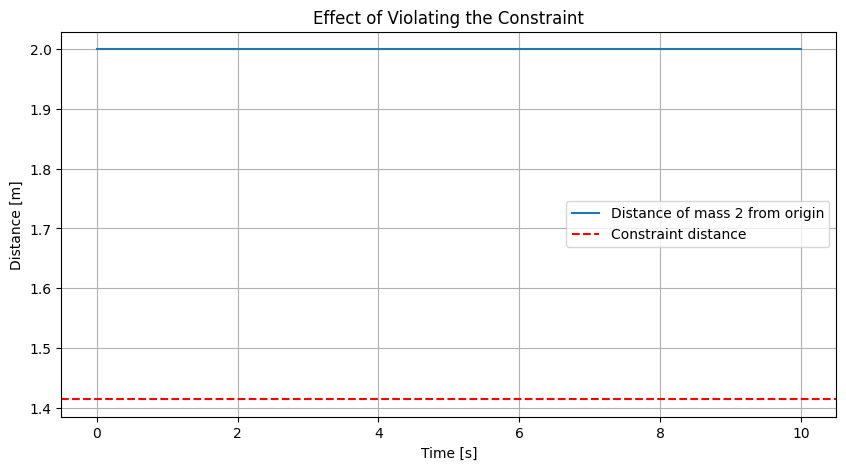

In [85]:
#System parameters
m1 = m2 = 1.0
L1 = L2 = 1.0
g = 9.81

def constrained_dynamics(state):
    th1, th2, w1, w2 = state
    th1_dd = f_th1dd(th1, th2, w1, w2)
    th2_dd = f_th2dd(th1, th2, w1, w2)
    return np.array([w1, w2, th1_dd, th2_dd])

s0_violate = np.array([0.0, 0.0, 0.0, 0.0])  # θ1=0, θ2=0, all velocities zero

#Run simulation
dt = 0.01
tspan = [0, 10]
tvec, traj_violate = simulate(constrained_dynamics, s0_violate, tspan, dt, euler_integrate)

#Compute "distance of second mass from origin" over time
theta1 = traj_violate[0, :]
theta2 = traj_violate[1, :]
x2 = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2)
y2 = -L1 * np.cos(theta1) - L2 * np.cos(theta1 + theta2)
dist2 = np.sqrt(x2**2 + y2**2)

#Plotting
plt.figure(figsize=(10,5))
plt.plot(tvec, dist2, label='Distance of mass 2 from origin')
plt.axhline(np.sqrt(2), color='r', linestyle='--', label='Constraint distance')
plt.xlabel('Time [s]')
plt.ylabel('Distance [m]')
plt.title('Effect of Violating the Constraint')
plt.legend()
plt.grid(True)
plt.show()
